In [1]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')


In [2]:
from DATA import MG17

data = MG17(True, [80,10,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

In [3]:
from ESN import Reservoir
reservoir = Reservoir(N = 30, sparsity=0.9, ro_rescale=0.25, bias = True)

In [4]:
reservoir.LCE(X_TR)


c:\Users\casa_\OneDrive\Desktop\workspace\ESN-IP\NOTEBOOKS\./../../ESN-IP/IP/.\ESN.py:122: RuntimeWarning: divide by zero encountered in log
  eig_acc += np.log(np.absolute(eig_k))


-1.4731606

In [5]:
reservoir.de_fi()

(0.9999985712607058+1.1664635287190247e-14j)

In [6]:
from IntrinsicPlasticity import IPMask

In [7]:
from IPReservoir import IPReservoir
ip_reservoir = IPReservoir(N = 30, sparsity=0.9, ro_rescale=0.25, bias = True, mask=IPMask.normalMask(30))

In [8]:
ip_reservoir.pre_train(X_TR, epochs=10)

- Epoch: 1) | KL Divergence value: 2418.83984375.
- Epoch: 2) | KL Divergence value: 2318.11083984375.
- Epoch: 3) | KL Divergence value: 2224.560546875.
- Epoch: 4) | KL Divergence value: 2138.501708984375.
- Epoch: 5) | KL Divergence value: 2060.615234375.
- Epoch: 6) | KL Divergence value: 1992.0439453125.
- Epoch: 7) | KL Divergence value: 1933.94873046875.
- Epoch: 8) | KL Divergence value: 1886.7921142578125.
- Epoch: 9) | KL Divergence value: 1850.043701171875.
- Epoch: 10) | KL Divergence value: 1822.4461669921875.


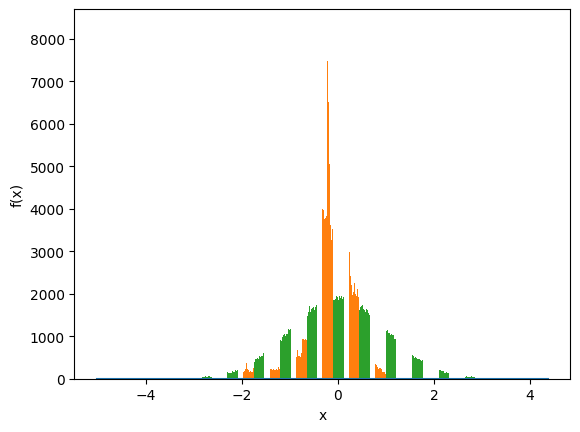

In [9]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

In [10]:
ip_reservoir.LCE(X_VAL)

c:\Users\casa_\OneDrive\Desktop\workspace\ESN-IP\NOTEBOOKS\./../../ESN-IP/IP/.\ESN.py:122: RuntimeWarning: divide by zero encountered in log
  eig_acc += np.log(np.absolute(eig_k))


-0.71944606

In [11]:
ip_reservoir.LCE(X_TS)

-0.719447

In [12]:
ip_reservoir.LCE(X_TR)

-0.71949655

In [13]:
ip_reservoir.de_fi()

(1.0000000557030395-2.7838676611730404e-16j)